# 명함 검출과 인식
## 1. 개요
![image](https://user-images.githubusercontent.com/118172599/235926521-895777a1-365e-4222-8302-8b36eafba169.png)


## 2. 이진화

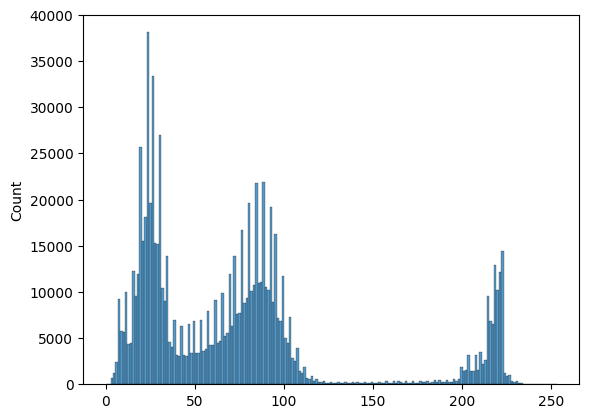

In [20]:
import sys
import cv2
import numpy as np
import seaborn as sns

# 픽셀데이터 분포 확인
src = cv2.imread("./data/namecard1.jpg")
src_gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)

sns.histplot(src_gray.reshape(-1,));

In [22]:
import sys
import cv2

src = cv2.imread("./data/namecard1.jpg")

if src is None:
    print("Image load failed!")
    sys.exit()

# 흑백으로 변환
src_gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)

# 자동 이진화
th, src_bin = cv2.threshold(src_gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
print("Auto threshold:", th)

cv2.imshow('src', src)
cv2.imshow('src_bin', src_bin)
cv2.waitKey()
cv2.destroyAllWindows()

Auto threshold: 133.0


## 3. 객체의 외곽선 검출

In [23]:
import sys
import random
import cv2

src = cv2.imread("./data/namecard1.jpg")

if src is None:
    print("Image load failed!")
    sys.exit()
    
# 입력 영상을 그레이스케일 영상으로 변환
src_gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)

# 자동 이진화
_, src_bin = cv2.threshold(src_gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

# 외곽선 검출 및 명함 검출
contours, _ = cv2.findContours(src_bin, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

# 이진 영상을 컬러 영상 형식으로 변환
dst = cv2.cvtColor(src_bin, cv2.COLOR_GRAY2BGR)

# 검출된 외곽선 모두 그리기
for i in range(len(contours)):
    c = (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))
    cv2.drawContours(dst, contours, i, c, 2)

cv2.imshow('src', src)
cv2.imshow('dst', dst)
cv2.waitKey()
cv2.destroyAllWindows()

# 4. 외곽선 함수

In [24]:
import sys
import cv2


# 영상 불러오기
src = cv2.imread('./data/namecard1.jpg')

if src is None:
    print('Image load failed!')
    sys.exit()

# 입력 영상을 그레이스케일 영상으로 변환
src_gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)

# 자동 이진화
_, src_bin = cv2.threshold(src_gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

# 외곽선 검출 및 명함 검출
contours, _ = cv2.findContours(src_bin, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

for pts in contours:
    # 너무 작은 객체는 무시
    if cv2.contourArea(pts) < 1000:
        continue

    # 외곽선 근사화
    approx = cv2.approxPolyDP(pts, cv2.arcLength(pts, True)*0.02, True)

    # 사각형으로 근사화되면 외곽선 표시
    if len(approx) == 4:
        cv2.polylines(src, [approx], True, (0, 255, 0), 2, cv2.LINE_AA)

cv2.imshow('src', src)
cv2.waitKey()
cv2.destroyAllWindows()


# 5. 명함 똑바로 펴기
## 수동

In [26]:
import sys
import numpy as np
import cv2


# 영상 불러오기
src = cv2.imread('./data/namecard1.jpg')

if src is None:
    print('Image load failed!')
    sys.exit()

# 출력 영상 설정
w, h = 720, 400
srcQuad = np.array([[324, 308], [760, 369], [718, 611], [231, 517]], np.float32)
dstQuad = np.array([[0, 0], [w-1, 0], [w-1, h-1], [0, h-1]], np.float32)
dst = np.zeros((h, w), np.uint8)

pers = cv2.getPerspectiveTransform(srcQuad, dstQuad)
dst = cv2.warpPerspective(src, pers, (w, h))

cv2.imshow('src', src)
cv2.imshow('dst', dst)
cv2.waitKey()
cv2.destroyAllWindows()

## 자동

In [30]:
import sys
import numpy as np
import cv2

# approx 좌표 순서 지정
def reorderPts(pts):
    idx = np.lexsort((pts[:, 1], pts[:, 0]))  # 칼럼0 -> 칼럼1 순으로 정렬한 인덱스를 반환
    pts = pts[idx]  # x좌표로 정렬

    if pts[0, 1] > pts[1, 1]:
        pts[[0, 1]] = pts[[1, 0]]

    if pts[2, 1] < pts[3, 1]:
        pts[[2, 3]] = pts[[3, 2]]

    return pts


# 영상 불러오기
src = cv2.imread('./data/namecard2.jpg')

if src is None:
    print('Image load failed!')
    sys.exit()

# 출력 영상 설정
w, h = 720, 400
srcQuad = np.array([[0, 0], [0, h], [w, h], [w, 0]], np.float32)
dstQuad = np.array([[0, 0], [0, h], [w, h], [w, 0]], np.float32)
dst = np.zeros((h, w), np.uint8)

# 입력 영상을 그레이스케일 영상으로 변환
src_gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)

# 자동 이진화
_, src_bin = cv2.threshold(src_gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

# 외곽선 검출 및 명함 검출
contours, _ = cv2.findContours(src_bin, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

for pts in contours:
    # 너무 작은 객체는 무시
    if cv2.contourArea(pts) < 1000:
        continue

    # 외곽선 근사화
    approx = cv2.approxPolyDP(pts, cv2.arcLength(pts, True)*0.02, True)

    # 사각형으로 근사화되면 외곽선 표시
    if len(approx) == 4:
        #cv2.polylines(src, [approx], True, (0, 255, 0), 2, cv2.LINE_AA)
        corners = approx.reshape(4, 2).astype(np.float32)
        srcQuad = reorderPts(corners)


pers = cv2.getPerspectiveTransform(srcQuad, dstQuad)
dst = cv2.warpPerspective(src, pers, (w, h))

cv2.imshow('src', src)
cv2.imshow('dst', dst)
cv2.waitKey()
cv2.destroyAllWindows()
